<a href="https://colab.research.google.com/github/gianmarcozironelli/machine_learning/blob/main/ML01_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bayesian decision theory

In this session we will see with an example how bayesian decision theory works, and how prior and likelihood contribute in generating the posterior.

We define two different (gaussian) distributions $p(x|omega)$ and will make decisions based on Bayes theorem.

Let's generate two gaussian distributions with different $\mu$ and $\sigma$, and compute the posterior probability by usign a uniform prior.

Then play with the prior values and analyse what is the impact on the posterior.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
# Generate the functions' domain
x = np.linspace(0,20,100)

# Generating two probability density functions where (x, location = m, scale = sigma)
p1 = norm.pdf( x, 4, 2)
p2 = norm.pdf( x, 6, 1.8)

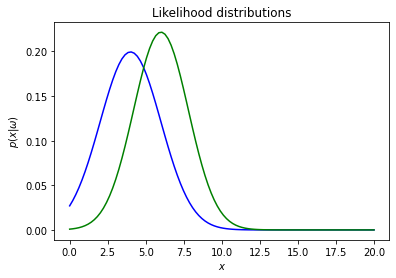

In [ ]:
# Plot the gaussian distributions (likelihood)
plt.plot( x, p1, 'b')
plt.plot( x, p2, 'g')
plt.title('Likelihood distributions')
plt.ylabel('$p(x|\omega)$')
plt.xlabel('$x$')
plt.show()

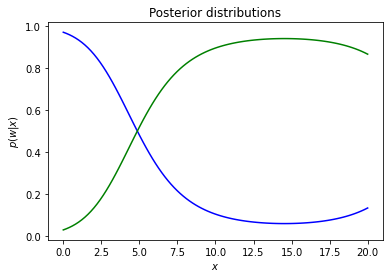

In [ ]:
# Initialize the priors
Pw1 = 0.5
Pw2 = 1-Pw1

# Compute the posterior with Bayes theorem
pp1 = p1 * Pw1 / (p1*Pw1 + p2*Pw2)
pp2 = p2 * Pw2 / (p1*Pw1 + p2*Pw2)

# Visualize the posterior distributions
plt.plot( x, pp1, 'b')
plt.plot( x, pp2, 'g')
plt.title('Posterior distributions')
plt.ylabel('$p(w|x)$')
plt.xlabel('$x$')
plt.show()

Introduce a loss function and compute the likelihood ratio. Then change the entries of the loss function and analyse their impact on the ratio.

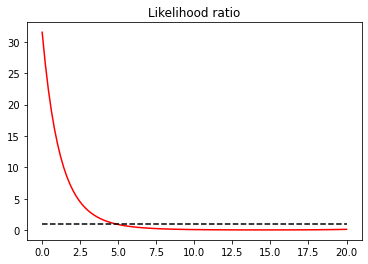

In [ ]:
# Define the Loss function
l11 = 0
l12 = 1
l21 = 1
l22 = 0

# Compute the likelihood ratio
lr = np.divide(p1,p2)

# Compute the discriminant threshold
theta = (l12-l22)/(l21-l11) * Pw2/Pw1

# Visualize the results
plt.plot( x, lr, 'r')
plt.plot( x, theta*np.ones(len(x)), 'k--')
plt.title('Likelihood ratio')
plt.show()


#Naive Bayes approach for Real world problem

# Bayesian classification

In this session we will see how it is possible to use Bayes theorem in supervised machine learning to perform multiclass categorization.

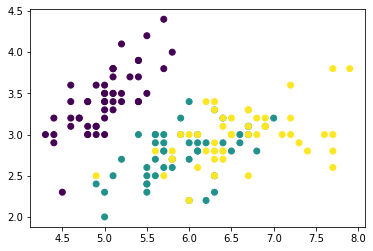

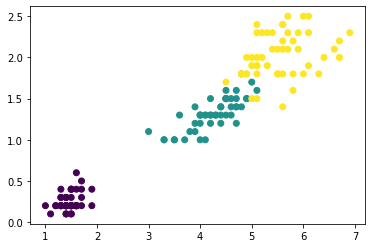

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the dataset from sklearn
x, y = load_iris( return_X_y=True )

# Visualize data
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

plt.scatter(x[:,2],x[:,3],c=y)
plt.show()


### Fit gaussian distributions

Estimate $\mu$ and $\sigma$ of each distribution.

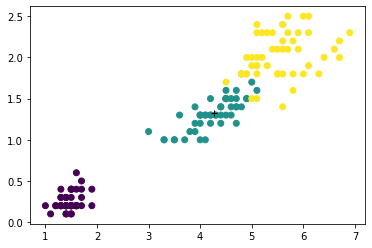

In [ ]:
import numpy as np

# Identify members of each class
cl1 = x[ y==0, :]
cl2 = x[ y==1, :]
cl3 = x[ y==2, :]

# Compute the mean (centroid) of each class
m1 = np.mean( cl1, axis=0)
m2 = np.mean( cl2, axis=0)
m3 = np.mean( cl3, axis=0)

# Compute the covariance matrix for each class
C1 = np.cov( cl1, rowvar=False)
C2 = np.cov( cl2, rowvar=False)
C3 = np.cov( cl3, rowvar=False)

plt.scatter(x[:,2], x[:,3], c=y)
plt.plot(m2[2], m2[3], 'k+')
plt.show()

### Make decisions

Assign each sample to the best class according to Bayes decition theory (i.e. the one that maximize the posterior probability).

In [ ]:
#uniform priors
pw1 = 1/3
pw2 = 1/3
pw3 = 1/3

#for each samples I have to compute the likelihood over the 3 distriutions;
#then I have to multiply with the prior and take the maximum

from scipy.stats import multivariate_normal

# compute the likelihood for each sample and each class 
lik1 = multivariate_normal.pdf( x, m1, C1)
lik2 = multivariate_normal.pdf( x, m2, C2)
lik3 = multivariate_normal.pdf( x, m3, C3)

In [ ]:
#with np.stack I'm stacking the elements in vertical dimension
lik_stack = np.vstack( (lik1,lik2,lik3) )
# Compute the log of each likelihood and assign the best class
loglik = np.log(lik_stack)
prediction = np.argmax( loglik, axis=0)

<function matplotlib.pyplot.show(*args, **kw)>

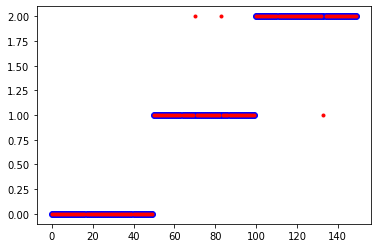

In [ ]:
#visualize the results
plt.plot(y, 'bo')
plt.plot(prediction, 'r.')
plt.show

where the blue part are the correct labels and the red ones are the predicted labels. Basically we have 3 errors here

In [ ]:
# Compute accuracy of predictions
accuracy = np.sum( prediction == y) / len(y)
print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')

Classifier accuracy: 98.00%


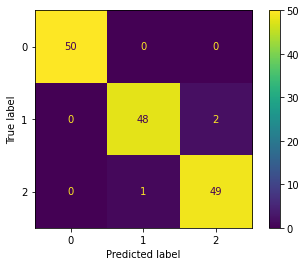

In [ ]:
#display the matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,prediction)
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm).plot()

##Introduce a prior
Repeat the exercize introducing a non-uniform prior probability on the classes: $P(\omega_1) = P(\omega_2) = 0.1$ and $P(\omega_3) = 0.8$

Classifier accuracy: 98.00%


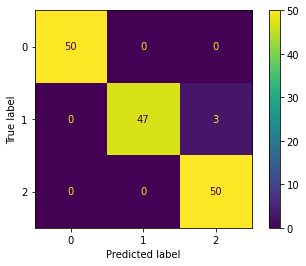

In [ ]:
# Define the priors
Pw1 = 0.1
Pw2 = 0.2
Pw3 = 0.7

# Compute posterior probabilities
post1 = multivariate_normal.pdf(x,m1,C1) * Pw1
post2 = multivariate_normal.pdf(x,m2,C2) * Pw2
post3 = multivariate_normal.pdf(x,m3,C3) * Pw3

# Assign the best classes
logpost = np.log( np.vstack( (post1,post2,post3) ) )
prediction = np.argmax( logpost, axis=0)

# Compute accuracy of predictions
accuracy = np.sum( prediction == y) / len(y)
print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,prediction)
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(cm).plot()

## With Scikit-Learn

We will now use the naive Bayes classifier embedded in scikit-learn package.

https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
gnb = GaussianNB()

# Fit the classifier parameters
gnb.fit( x, y)

# Predict the correct classes
y_pred = gnb.predict( x )

# Compute accuracy of predictions
accuracy = np.sum( prediction == y) / len(y)
print('Classifier accuracy: ' + "{0:.2f}".format(accuracy*100) + '%')

Classifier accuracy: 98.00%
